In [1]:
import xml.etree.ElementTree as ET
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../..")
import cv2
import numpy as np
from glob import glob
from models import Yolov4

In [2]:
IMAGE_PATH = '../../dataset/butelka/butelki_orig_images/'

CLASSES_PATH = '../../class_names/butelka_classes.txt'
DEST_PATH = '../../dataset/butelka/bottle_classification/wyciete/w_czesci'

'''loads the classes'''
def get_classes(classes_path):
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names


classes = get_classes(CLASSES_PATH)
assert len(classes) > 0, 'no class names detected!'
print(f'num classes: {len(classes)}')


num classes: 2


In [3]:
yolo_model = Yolov4(class_name_path='../../class_names/butelka_classes.txt')
yolo_model.load_model('../butelki_yolo/wagi')

Yolov4
(416, 416, 3)
Build model


2021-12-21 17:47:31.204124: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-21 17:47:31.217674: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-21 17:47:31.218657: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-21 17:47:31.221159: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-21 17:47:31.222089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read f

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 416, 416, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 416, 416, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 416, 416, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

nms iou: 0.413 score: 0.3
nms iou: 0.413 score: 0.3


In [4]:
def get_all_files_from_subdirs(dir):
    pass

In [5]:
def extract_top_from_orig(model, dirs, num_files = None):
    for directory in dirs:
        num_files_converted = 0

        try:
            os.mkdir(os.path.join(DEST_PATH, directory))
        except OSError as error:
            print(error)    

        processed_images = glob(os.path.join(DEST_PATH, directory, '*'))
                
        for path in glob(os.path.join(IMAGE_PATH, directory, '*')):
            print(path)
            print(f"zrobiono: {num_files_converted}")
            image_name = path.split('/')[-1]
            dest_path = os.path.join(DEST_PATH, directory, image_name) 
            if(num_files != None and num_files_converted >= num_files):
                break
            
            if(dest_path in processed_images):
                continue
            
            cropped_image = crop_image_with_yolo(model, path)
            if(cropped_image is None):
                continue
            
            cv2.imwrite(dest_path, cropped_image)
            num_files_converted = num_files_converted + 1

In [6]:
def crop_image_with_yolo(model, img_path):
    orig_img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)[:, :, :]            
    if(orig_img.shape[0] < orig_img.shape[1]):
        orig_img = cv2.rotate(orig_img, cv2.ROTATE_90_CLOCKWISE)
    
    detections = model.predict(img_path, random_color = True)
    if(len(detections.values) >= 1):
        scores = detections.values[:,5]
        max_scores_index = np.argmax(scores)
        detection = detections.values[max_scores_index]
        return orig_img[detection[1]:detection[3], detection[0]:detection[2]]
    return None

In [7]:
dirs = ['w_polowie']

[Errno 17] File exists: '../../dataset/butelka/bottle_classification/wyciete/w_czesci/w_polowie'
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_5084.JPG
zrobiono: 0
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4669.JPG
zrobiono: 0
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_5194.JPG
zrobiono: 0
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_5107.JPG
zrobiono: 0
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4649.JPG
zrobiono: 0
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4656.JPG
zrobiono: 0
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_5111.JPG
zrobiono: 0
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_5024.JPG
zrobiono: 0
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_5117.JPG
zrobiono: 0
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4773.JPG
zrobiono: 0
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_5112.JPG
zrobiono: 0
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_

2021-12-21 17:47:57.379614: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-21 17:48:00.453227: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


# of bboxes: 1


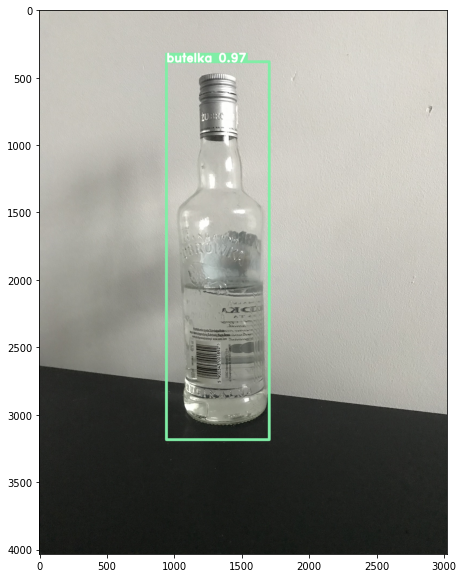

../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4772.JPG
zrobiono: 1
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4644.JPG
zrobiono: 1
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4789.JPG
zrobiono: 1
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_5008.JPG
zrobiono: 1
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4748.JPG
zrobiono: 1
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4518.JPG
zrobiono: 1
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4348.JPG
zrobiono: 1
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4793.JPG
zrobiono: 1
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4277.JPG
zrobiono: 1
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4404.JPG
zrobiono: 1
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4652.JPG
zrobiono: 1
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4966.JPG
zrobiono: 1
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4386.JPG
zrobiono: 1

img shape:  (4032, 3024, 3)
# of bboxes: 1


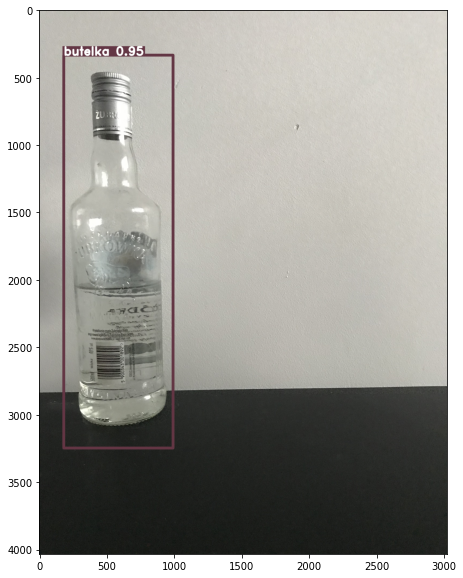

../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4287.JPG
zrobiono: 2
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4368.JPG
zrobiono: 2
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4295.JPG
zrobiono: 2
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4388.JPG
zrobiono: 2
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4571.JPG
zrobiono: 2
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_5059.JPG
zrobiono: 2
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4906.JPG
zrobiono: 2
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4771.JPG
zrobiono: 2
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4819.JPG
zrobiono: 2
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4745.JPG
zrobiono: 2
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4402.JPG
zrobiono: 2
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4676.JPG
zrobiono: 2
../../dataset/butelka/butelki_orig_images/w_polowie/IMG_4949.JPG
zrobiono: 2

In [8]:
extract_top_from_orig(yolo_model, dirs, num_files = None)

In [9]:
glob(os.path.join(IMAGE_PATH,'*'))

['../../dataset/butelka/butelki_orig_images/pusta',
 '../../dataset/butelka/butelki_orig_images/w_polowie',
 '../../dataset/butelka/butelki_orig_images/w_czesci',
 '../../dataset/butelka/butelki_orig_images/pelna',
 '../../dataset/butelka/butelki_orig_images/prawie_pelna']